In [183]:

import pandas as pd

from sklearn.externals import joblib
# Added version check for recent scikit-learn 0.18 checksok ca
from distutils.version import LooseVersion as Version
import numpy as np
from dateutil.parser import parse
import datetime as dt

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_recall_fscore_support 

from collections import OrderedDict
import pickle 
import matplotlib.pyplot as plt
import seaborn as sns
import random, os, csv      # random is the rng, os is the operating system, and csv handles
                            # CSV files
import matplotlib.pyplot as plt  # This is the plotter
import time                 # This allows for lots of neat tricks.
import powerlaw
import mpmath
dataparser = lambda x: pd.datetime.strptime(x, '%M:%S.%f').time()

In [239]:
def returns(s):
    #compute log returns
    arr = np.diff(np.log(s))
    return (pd.Series(arr, index=s.index[1:]))

def tick_bars(df, price_column, m):
    '''
    compute tick bars
    # args
        df: pd.DataFrame()
        column: name for price data
        m: int(), threshold value for ticks
    # returns
        idx: list of indices
    '''
    t = df[price_column]
    ts = 0
    idx = []
    for i, x in enumerate(tqdm(t)):
        ts += 1
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    return idx
def tick_bar_df(df, price_column, m):
    idx = tick_bars(df, price_column, m)
    return df.iloc[idx]
#========================================================
def volume_bars(df, volume_column, m):
    '''
    compute volume bars
    # args
        df: pd.DataFrame()
        column: name for volume data
        m: int(), threshold value for volume
    # returns
        idx: list of indices
    '''
    t = df[volume_column]
    ts = 0
    idx = []
    for i, x in enumerate(tqdm(t)):
        ts += x
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    return idx

def volume_bar_df(df, volume_column, m):
    idx = volume_bars(df, volume_column, m)
    return df.iloc[idx]
#========================================================
def dollar_bars(df, dv_column, m):
    '''
    compute dollar bars
    # args
        df: pd.DataFrame()
        column: name for dollar volume data
        m: int(), threshold value for dollars
    # returns
        idx: list of indices
    '''
    t = df[dv_column]
    ts = 0
    idx = []
    for i, x in enumerate(tqdm(t)):
        ts += x
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    return idx

def dollar_bar_df(df, dv_column, m):
    idx = dollar_bars(df, dv_column, m)
    return df.iloc[idx]
#========================================================

In [184]:
futures_data_folder= '/home/ak/Documents/Data/FuturesData/'
csv_files=[s for s in os.listdir(futures_data_folder) if s.endswith('.csv')]

In [186]:
csv_idx=1
csv_loc = "".join((futures_data_folder,csv_files[csv_idx]))
raw_data=pd.read_csv(csv_loc)
raw_data.columns.values

array(['Unnamed: 0', 'bestAskPrice', 'bestBidSize', 'bestAskSize',
       'bestBidPrice'], dtype=object)

In [187]:
raw_data=raw_data.rename(columns={'Unnamed: 0':'TimeStamp'})
raw_data.shape

(18330, 5)

In [188]:
# from StringIO import StringIO
# in_ = StringIO()
# in_.write(raw_data['TimeStamp'])
# in_.seek(0)


In [190]:
raw_data['TimeStamp']=raw_data['TimeStamp'].apply(dataparser)

In [191]:
# raw_data['TimeStamp']=pd.to_datetime(raw_data['TimeStamp'], format='%M:%S.%f' )
# raw_data['TimeStamp'].dt.time

In [206]:
t=raw_data['TimeStamp'][1]
seconds = (t.hour * 60 + t.minute) * 60 + t.second

In [215]:
for x in range(raw_data.shape[0]):
    t= raw_data['TimeStamp'][x]
    print (t.hour*60 + t.minute)*60 + t.second 

0
2
5
25
48
52
58
58
61
63
63
63
63
65
65
97
97
99
99
99
102
102
118
118
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
134
144
144
144
144
144
144
144
150
184
187
188
188
188
188
188
189
193
204
236
240
240
240
240
242
244
245
245
245
245
247
247
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
262
263
263
263
263
263
263
264
264
265
265
266
266
266
266
266
266
275
278

55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
57
57
57
57
58
58
58
58
58
60
62
64
66
66
72
72
72
72
72
72
75
76
77
78
79
80
84
84
84
84
84
84
84
84
84
84
84
84
84
86
92
138
138
209
210
210
217
298
317
322
334
386
386
386
386
386
386
399
412
416
433
441
447
458
472
472
534
534
534
534
534
534
534
539
539
539
539
539
540
560
576
598
605
629
652
652
655
664
664
664
664
664
673
675
699
699
699
716
722
722
722
745
745
745
821
864
864
864
864
864
864
864
900
930
940
940
940
949
957
957
957
991
1084
1084
1092
1092
1092
1126
1126
1126
1126
1126
1126
1126
1126
1126
1126
1127
1129
1136
1140
1140
1140
1140
1147
1157
1157
1157
1157
1157
1191
1259
1259
1262
1298
1340
1340
1340
1354
1354
1355
1355
1355
1355
1355
1372
1429
1435
1449
1471
1471
1471
1471
1471
1471
1471
1471
1473
1473
1474
1474
1474
1474
1474
1474
1477
1478
1478
1482
1482
1482
1482
1482
1482
1482
1482
1483
1491
1491
1520
1525
1526
152

1042
1042
1042
1042
1042
1042
1042
1042
1042
1042
1042
1042
1042
1042
1042
1042
1042
1042
1042
1042
1042
1042
1042
1042
1042
1042
1042
1042
1042
1042
1042
1042
1045
1045
1045
1050
1061
1061
1074
1074
1074
1074
1077
1077
1078
1082
1087
1103
1103
1105
1108
1108
1109
1109
1109
1109
1109
1109
1109
1111
1114
1119
1119
1119
1119
1119
1119
1144
1144
1144
1144
1144
1144
1144
1151
1185
1185
1185
1185
1185
1185
1185
1185
1185
1185
1185
1195
1203
1205
1212
1213
1216
1216
1220
1234
1260
1260
1260
1262
1270
1278
1282
1293
1296
1297
1297
1297
1301
1303
1303
1304
1308
1308
1308
1308
1308
1308
1308
1308
1308
1308
1308
1308
1308
1308
1308
1308
1308
1308
1308
1308
1308
1308
1308
1308
1309
1310
1317
1321
1321
1321
1354
1354
1361
1398
1398
1398
1398
1403
1424
1434
1440
1444
1455
1455
1458
1458
1458
1458
1458
1458
1458
1458
1458
1458
1462
1462
1462
1462
1462
1462
1465
1474
1478
1483
1483
1483
1484
1485
1486
1487
1493
1495
1495
1495
1495
1495
1495
1495
1495
1495
1495
1495
1495
1495
1495
1495
1495
1495
1495


357
358
368
368
368
374
423
423
423
423
536
536
536
536
536
536
536
536
537
564
566
623
627
634
634
634
634
635
635
635
635
635
635
641
643
643
643
643
645
646
651
663
674
690
690
690
690
690
690
690
690
690
690
691
691
691
701
714
714
717
725
726
727
735
755
755
761
761
835
863
863
863
863
863
863
863
863
863
863
863
863
863
863
863
863
863
864
868
874
874
874
887
910
910
910
910
950
966
974
982
982
1002
1021
1032
1035
1035
1035
1035
1035
1058
1143
1143
1143
1143
1187
1269
1269
1279
1279
1356
1377
1377
1377
1377
1410
1428
1428
1428
1428
1463
1467
1467
1467
1467
1467
1467
1467
1467
1467
1467
1467
1490
1519
1595
1629
1712
1814
1873
1905
1921
1940
1982
2084
2088
2088
2094
2113
2119
2122
2125
2130
2136
2257
2257
2257
2264
2272
2301
2312
2322
2355
2357
2422
2446
2446
2446
2446
2446
2446
2446
2446
2446
2446
2446
2446
2446
2446
2446
2446
2446
2446
2446
2446
2446
2446
2446
2446
2446
2446
2446
2446
2446
2446
2446
2446
2446
2446
2446
2446
2446
2446
2446
2446
2446
2446
2446
2447
2447
2447
2447
2

2441
2441
2443
2444
2460
2460
2460
2460
2460
2460
2461
2461
2461
2463
2463
2464
2464
2464
2464
2466
2466
2467
2467
2471
2482
2501
2535
2596
2600
2600
2613
2615
2615
2615
2615
2616
2616
2616
2616
2617
2617
2636
2657
2662
2664
2664
2666
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2669
2674
2674
2674
2674
2674
2675
2675
2677
2678
2701
2701
2701
2702
2702
2703
2703
2703
2703
2703
2716
2716
2716
2716
2716
2716
2716
2718
2719
2722
2723
2724
2724
2724
2725
2726
2729
2730
2741
2759
2760
2761
2761
2784
2784
2799
2807
2861
2861
2877
2880
2881
2882
2883
2894
2897
2897
2903
2903
2924
2929
2937
2937
2937
2937
2937
2937
2937
2937
2937
2937
2944
2944
2944
2944
2944
2944
2944
2944
2944
2944
2944
2944
2944
2944
2944
2944
2944
2944
2944
2944
2949
2950
2950
2954
2956
2956
2956
2956
2956
2957
2957
2959
2959
2959


362
416
416
419
419
419
419
422
426
476
476
482
504
536
536
542
557
557
559
596
596
602
612
637
643
643
645
656
656
656
661
661
662
667
668
674
674
674
674
674
680
716
716
722
729
732
734
735
776
776
782
797
800
801
801
801
801
801
802
802
813
813
813
813
836
836
841
842
845
845
846
846
847
847
847
849
849
850
896
896
902
956
956
962
972
1016
1016
1016
1022
1076
1076
1082
1082
1136
1136
1142
1192
1196
1196
1202
1252
1252
1252
1252
1252
1256
1256
1262
1316
1316
1322
1376
1376
1382
1391
1391
1391
1391
1391
1406
1413
1417
1436
1436
1442
1451
1485
1496
1496
1496
1502
1521
1556
1556
1562
1593
1593
1594
1594
1597
1599
1601
1603
1616
1616
1616
1622
1642
1643
1645
1650
1676
1676
1682
1736
1736
1742
1796
1796
1797
1797
1797
1797
1797
1797
1798
1800
1801
1802
1802
1804
1804
1804
1804
1805
1816
1819
1819
1841
1841
1844
1845
1845
1856
1856
1860
1862
1874
1910
1912
1914
1916
1916
1916
1917
1918
1921
1922
1922
1923
1923
1926
1927
1927
1928
1930
1930
1930
1935
1939
1939
1950
1950
1976
1976
1978
1982


2444
2454
2455
2460
2479
2496
2518
2522
2563
2563
2563
2569
2572
2644
2660
2660
2660
2660
2665
2671
2679
2729
2755
2805
2805
2805
2805
2805
2806
2806
2806
2806
2812
2817
2861
2946
3019
3055
3055
3055
3055
3055
3055
3091
3093
3099
3101
3187
3225
3225
3264
3295
3302
3315
3315
3315
3315
3315
3315
3322
3329
3331
3332
3341
3394
3410
3437
3490
3490
3490
3490
3490
3564
3564
3564
3564
3566
3566
3594
13
28
28
35
36
59
59
64
65
88
88
94
112
113
120
120
120
120
120
120
120
122
122
122
122
123
125
125
126
126
130
165
253
253
284
284
284
324
324
324
324
324
324
324
324
324
324
324
324
324
324
324
324
324
324
324
324
324
324
324
324
325
325
325
328
370
370
370
370
370
370
370
374
383
459
459
467
468
468
473
474
478
481
482
526
526
526
548
548
552
597
597
602
616
616
616
629
629
647
647
647
647
678
678
678
678
678
679
679
679
679
690
710
711
711
711
711
711
731
741
749
761
775
780
780
780
780
780
780
780
780
780
792
871
905
940
968
984
984
984
984
1020
1025
1025
1025
1025
1025
1025
1025
1040
1040
114

In [222]:
#[(x.hour*60 + x.minute)*60 + x.second for x in raw_data['TimeStamp']]

In [220]:
raw_data['TimeStampSeconds']=pd.DataFrame([int(datetime.timedelta(hours=t.hour, minutes=t.minute, seconds=t.second).total_seconds()) for t in raw_data['TimeStamp']])

In [223]:
raw_data['Duration']= raw_data['TimeStampSeconds'].diff(1)

In [227]:
raw_data=raw_data.dropna()

In [236]:
raw_data

,TimeStamp,bestAskPrice,bestBidSize,bestAskSize,bestBidPrice,TimeStampSeconds,Duration
1,00:00:02.800000,98.070,1689,2964,98.065,2,2.0
2,00:00:05.100000,98.070,1689,2973,98.065,5,3.0
3,00:00:25.800000,98.070,1689,2953,98.065,25,20.0
4,00:00:48.400000,98.070,1688,2953,98.065,48,23.0
5,00:00:52.900000,98.070,1688,2952,98.065,52,4.0
6,00:00:58.400000,98.070,1688,2943,98.065,58,6.0
7,00:00:58.500000,98.070,1679,2943,98.065,58,0.0
8,00:01:01.100000,98.070,1678,2943,98.065,61,3.0
9,00:01:03.100000,98.070,1678,2763,98.065,63,2.0
10,00:01:03.400000,98.070,1678,2771,98.065,63,0.0


In [5]:
#[parse(raw_data['TimeStamp'][x] for x in range(raw_data.shape[0]))]


In [53]:
durations=[]
length= raw_data.shape[0]-1
for idx in range(0,100):
    x=(parse(raw_data['TimeStamp'][idx])).time()
    y=datetime.timedelta(hours= x.hour, minutes=x.minute, seconds=x.second, microseconds=x.microsecond)
    durations.append(y.total_seconds())

In [76]:
# pd.to_timedelta(raw_data['TimeStamp'])
# # [parse(x) for x in raw_data['TimeStamp'][x]]
# # # x=times[1]
# # # # y = datetime.timedelta(hours=x.hour, minutes=x.minute, seconds=x.second, microseconds=x.microsecond)

In [71]:
import datetime
# datetime.datetime.strptime(raw_data['TimeStamp'][1])
parse(raw_data['TimeStamp'][26000])

datetime.datetime(2019, 4, 16, 11, 5, 24)

In [ ]:
y=datetime.timedelta(hours= x.hour, minutes=x.minute, seconds=x.second, microseconds=x.microsecond)

In [87]:
raw_data['microPrice']=(raw_data['bestAskPrice']*raw_data['bestAskSize']+ raw_data['bestBidPrice']*raw_data['bestBidSize'])/(raw_data['bestAskSize']+raw_data['bestBidSize'])

In [146]:
raw_data['returns'] =raw_data['microPrice'].pct_change()*100

In [147]:
df=raw_data.dropna()

In [148]:
def autocorr(x):
    n = x.size
    norm = (x - np.mean(x))
    result = np.correlate(norm, norm, mode='same')
    acorr = result[n//2 + 1:] / (x.var() * np.arange(n-1, n//2, -1))
    lag = np.abs(acorr).argmax() + 1
    r = acorr[lag-1]        
    if np.abs(r) > 0.5:
        print('Appears to be autocorrelated with r = {}, lag = {}'. format(r, lag))
    else: 
        print('Appears to be not autocorrelated')
    return r, lag


In [149]:
autocorr(df['microPrice'])

Appears to be autocorrelated with r = 0.996538132086, lag = 1


(0.9965381320857897, 1)

In [150]:
df['Sqrd_returns']=(df['returns']**2)*100

/home/ak/Envs/DataAnalysis/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


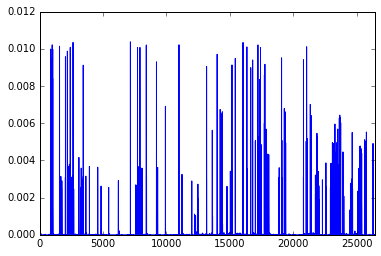

In [151]:
df['Sqrd_returns'].plot()

In [141]:
import statsmodels as sts
# Importing lag_plot
from pandas.tools.plotting import lag_plot
from pandas.tools.plotting import autocorrelation_plot


/home/ak/Envs/DataAnalysis/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


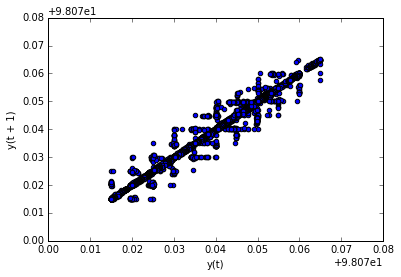

/home/ak/Envs/DataAnalysis/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """


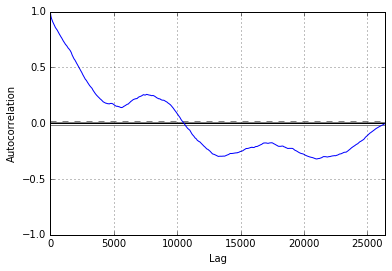

In [142]:
series = df['microPrice']
# Plotting the lagged values of the series
lag_plot(series)
plt.show()
autocorrelation_plot(series)
plt.show()

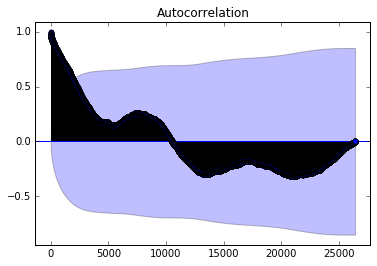

In [143]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(series)
plt.show()
# plot_pacf(series)
# plt.show()

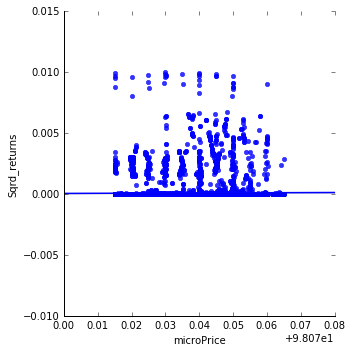

In [145]:
sns.lmplot(x='microPrice', y='Sqrd_returns', data=df)
#do calculation using high and low

In [152]:
import powerlaw
import mpmath

In [154]:
fit_returns_discrete = powerlaw.Fit(df['returns'], discrete=False) 
# fitwolf = powerlaw.Fit(Wolfdata, discrete=True)

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


In [155]:
fit_returns_discrete

In [ ]:
print("For the Generated Data")
print("Max Likelihood Estimate of Alpha: %5.3f" % (fitgen.power_law.alpha)) 
cutoffString_gen = '{:,.2f}'.format(fitgen.power_law.xmin)  # I'm just formatting the output
print("Cutoff value, xmin:  "+cutoffString_gen)